# **Seminar: Politische Debatten & Polarisierung im Bundestag**
## Sentimentanalyse im Kontext von Corona

In [2]:
# Import Basic Packages
import numpy as np                 # Numpy
import pandas as pd                 #Datafrane

# Import Visualization Packages
from collections import Counter     # um worte zu zählen
import matplotlib.pyplot as plt   # Für Visualisierung
import matplotlib.dates as mdates 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Wordcloud erstellen
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp


# Import NLP Packages
import nltk
import spacy

In [3]:
# Methoden aus anderem Modul importieren
import Sentiment_Methods

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


c:\Users\paula\anaconda3\envs\env1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. Datensätze vorbereiten

In [4]:
# df Legislaturperiode 2019 (24.10.2017-26.09.21)
# Import des vorselektierten Dataframes der Legislaturperiode 19 mit gegebenen Sentiment-Werten 
df_sentiment19 = pd.read_csv(r"C:\Users\paula\OneDrive\Uni\2. Lernpools Master\3. Semester\Soziologie\Data_Analysis\modellorginal19.csv")
df_sentiment19['date'] = pd.to_datetime(df_sentiment19['date'])
df_sentiment19.sort_values(by='date')

# Import des vorselektierten Dataframes der Legislaturperiode 20 mit gegebenen Sentiment-Werten 
df_sentiment20 = pd.read_csv(r"C:\Users\paula\OneDrive\Uni\2. Lernpools Master\3. Semester\Soziologie\Data_Analysis\modellorginal20.csv")
df_sentiment20['date'] = pd.to_datetime(df_sentiment20['date'])
df_sentiment20.sort_values(by='date')

Unnamed: 0                                               satz  \
705         744  Sie, sehr geehrte Kolleginnen und Kollegen von...   
726         765  Um vor die vierte Welle zu kommen, müssen wir ...   
727         766                              Und das schaffen wir.   
728         767  Das haben wir im Sommer schon geschafft, und w...   
729         768               Niedergelassene Ärzte werden impfen.   
..          ...                                                ...   
893         942  Sie sind verantwortlich für diesen beispiellos...   
892         941  Nach einer jahrzehntelangen Vernachlässigung d...   
891         940  Im zweiten Jahr hintereinander\n              ...   
911         960  Die Regierung aus Union und SPD hat unter dem ...   
914         963  Der DOSB und die AfD haben früh gesagt: Der Sp...   

              id  period       date            name party  redner_id  \
705   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
726   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
727   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
728   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
729   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
..           ...     ...        ...             ...   ...        ...   
893  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
892  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
891  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
911  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
914  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   

                    discussion_title  \
705  Tagesordnungspunkt 1 2021-11-18   
726  Tagesordnungspunkt 1 2021-11-18   
727  Tagesordnungspunkt 1 2021-11-18   
728  Tagesordnungspunkt 1 2021-11-18   
729  Tagesordnungspunkt 1 2021-11-18   
..                               ...   
893  Tagesordnungspunkt 6 2023-03-30   
892  Tagesordnungspunkt 6 2023-03-30   
891  Tagesordnungspunkt 6 2023-03-30   
911  Tagesordnungspunkt 6 2023-03-30   
914  Tagesordnungspunkt 6 2023-03-30   

                                                  text  \
705  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
726  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
727  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
728  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
729  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
..                                                 ...   
893  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
892  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
891  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
911  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
914  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   

                                        tokenized_text  \
705  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
726  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
727  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
728  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
729  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
..                                                 ...   
893  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
892  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
891  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
911  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
914  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   

                                                tokens  \
705  ['Union', 'allerdings', 'verfassungsrechtlich'...   
726  ['vierte', 'Welle', 'kommen', 'müssen', 'tägli...   
727                                       ['schaffen']   
728  ['Sommer', 'schon', 'geschafft', 'brauchen', '...   
729             ['Niedergelassene', 'Ärzte', 'impfen']   
..                                                 ...   
893  ['verantwortl

In [125]:
# Define a dictionary to map politician names to parties which are currently "unknown"
party_mapping = {
    'Olaf Scholz': 'SPD',
    'Horst Seehofer': 'CDU/CSU',
    'Annegret Kramp-Karrenbauer': 'CDU/CSU',
    'Dr. Volker Wissing': 'FDP',
    'Michael Kretschmer': 'CDU/CSU',
    'Dr. Janosch Dahmen': 'BÜNDNIS 90/DIE GRÜNEN',
    'Svenja Schulze': 'SPD'
}

# Apply the mapping to update the 'party' column based on 'name'
df_sentiment20['party'] = df_sentiment20['name'].map(party_mapping).fillna(df_sentiment20['party'])
df_sentiment19['party'] = df_sentiment19['name'].map(party_mapping).fillna(df_sentiment19['party'])

In [141]:
# Erstellen eines merged Dataframes

merged_df = pd.concat([df_sentiment19, df_sentiment20], ignore_index=True)


In [142]:
#Einlesen der Corona Fallzahlen für den Zeitraum 25.02.2020-21.04.2023
url="https://raw.githubusercontent.com/robert-koch-institut/COVID-19_7-Tage-Inzidenz_in_Deutschland/main/COVID-19-Faelle_7-Tage-Inzidenz_Deutschland.csv"
corona_fallzahlen = pd.read_csv(url,parse_dates=[0])

#Changing the wording of meldedatum to date
corona_fallzahlen.rename(columns={'Meldedatum': 'date'}, inplace=True)
corona_fallzahlen['date'] = pd.to_datetime(corona_fallzahlen['date'])
corona_fallzahlen.sort_values(by='date')

date Altersgruppe  Bevoelkerung  Faelle_gesamt  Faelle_neu  \
0    2020-01-03        00-04       3975333              0           0   
1    2020-01-03          00+      83237124              1           1   
2    2020-01-03        05-14       7631602              0           0   
3    2020-01-03        15-34      18795840              0           0   
4    2020-01-03        35-59      28403806              0           0   
...         ...          ...           ...            ...         ...   
9430 2023-09-11          00+      83237124       38469495           0   
9431 2023-09-11        05-14       7631602        4497140           0   
9432 2023-09-11        15-34      18795840       11183463           0   
9433 2023-09-11        35-59      28403806       14969964           0   
9435 2023-09-11          80+       6111655        1641684           0   

      Faelle_7-Tage  Inzidenz_7-Tage  
0                 0              0.0  
1                 0              0.0  
2                 0              0.0  
3                 0              0.0  
4                 0              0.0  
...             ...              ...  
9430           6144              7.4  
9431             98              1.3  
9432           1018              5.4  
9433           1714              6.0  
9435           1411             23.1  

[9436 rows x 7 columns]

In [143]:
# Im Nächsten Schritt wollen wir den Dataframe filtern damit wir nur die Fälle auf Bundesebene für alle Alltersgruppen = Merkamle ID_ Altersgruppr = 00+ erhalten 
corona_fallzahlen_gesamt = corona_fallzahlen[corona_fallzahlen["Altersgruppe"]== "00+"]
corona_fallzahlen_gesamt

date Altersgruppe  Bevoelkerung  Faelle_gesamt  Faelle_neu  \
1    2020-01-03          00+      83237124              1           1   
8    2020-01-04          00+      83237124              1           0   
15   2020-01-05          00+      83237124              1           0   
22   2020-01-06          00+      83237124              1           0   
29   2020-01-07          00+      83237124              1           0   
...         ...          ...           ...            ...         ...   
9402 2023-09-07          00+      83237124       38467559        1255   
9409 2023-09-08          00+      83237124       38468814        1255   
9416 2023-09-09          00+      83237124       38469495         681   
9423 2023-09-10          00+      83237124       38469495           0   
9430 2023-09-11          00+      83237124       38469495           0   

      Faelle_7-Tage  Inzidenz_7-Tage  
1                 0              0.0  
8                 0              0.0  
15                0              0.0  
22                0              0.0  
29                0              0.0  
...             ...              ...  
9402           6139              7.4  
9409           6431              7.7  
9416           6332              7.6  
9423           6223              7.5  
9430           6144              7.4  

[1348 rows x 7 columns]

In [144]:

def calculate_average_sentiment_score(df):
    """
    Calculate the average sentiment score for each unique 'id' in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing 'date', 'party', 'name', 'id', 'text', 'period', 'sentiment_label'.

    Returns:
        pd.DataFrame: A new DataFrame with the average sentiment score for each 'id'.
    """
    # Create a mapping of sentiment labels to sentiment scores (you can adjust these scores)
    sentiment_score_map = {
        'positive': 0.0,
        'neutral': 50.0,
        'negative': 100.0
    }

    # Map sentiment labels to sentiment scores
    df['Sentiment_Score'] = df['Sentiment_Label'].map(sentiment_score_map)

    # Group the DataFrame by 'id' and calculate the average sentiment score for each 'id'
    result_df = merged_df.groupby('id').agg({
        'date': 'first',        # Keep the original 'date'
        'party': 'first',       # Keep the original 'party'
        'name': 'first',        # Keep the original 'name'
               # Keep the original 'id'
        'text': 'first',        # Keep the original 'satz'
        'period': 'first',      # Keep the original 'period'
        'Sentiment_Score': 'mean'  # Calculate the average sentiment score
    }).reset_index()

    return result_df

# Example usage:
# Assuming you have a DataFrame 'merged_df' with columns 'date', 'party', 'name', 'id', 'satz', 'period', 'sentiment_label'
result_df = calculate_average_sentiment_score(merged_df)
print(result_df)


               id       date                  party                 name  \
0    ID1914800900 2020-03-04                    FDP       Andrew Ullmann   
1    ID1915300100 2020-03-13                    SPD          Olaf Scholz   
2    ID1915400200 2020-03-25                    AfD    Alexander Gauland   
3    ID1915401300 2020-03-25                CDU/CSU        Thorsten Frei   
4    ID1915402500 2020-03-25                    SPD  Christine Lambrecht   
..            ...        ...                    ...                  ...   
238   ID207703900 2022-12-16  BÜNDNIS 90/DIE GRÜNEN           Armin Grau   
239   ID207704300 2022-12-16                    SPD     Herbert Wollmann   
240   ID207707100 2022-12-16              DIE LINKE       Kathrin Vogler   
241   ID207910600 2023-01-19                    AfD       Christina Baum   
242   ID209400400 2023-03-30                    AfD           Jörn König   

                                                  text  period  \
0    Sehr geehrter He

In [145]:
from transformers import pipeline

# Load the text classification pipeline
pipeline_classification_topics = pipeline("text-classification", model="chkla/parlbert-topic-german", return_all_scores=False)

# Assuming you have a DataFrame 'result_df' with a 'text' column
# Extract the text data from the DataFrame
texts_to_classify = result_df['text']

# Initialize an empty list to store the classification results
classification_results = []

# Set a maximum token length for the model
max_token_length = 512  # Adjust this value based on your model's maximum token limit

# Iterate through the text entries and classify them
for text in texts_to_classify:
    # Split the long text into segments that fit within the model's token limit
    segments = [text[i:i+max_token_length] for i in range(0, len(text), max_token_length)]
    
    # Classify each segment separately
    segment_results = [pipeline_classification_topics(segment) for segment in segments]
    
    # Combine the results from all segments (you can customize how you combine them)
    combined_result = {
        'topic': [result[0]['label'] for result in segment_results],
        'probability': [result[0]['score'] for result in segment_results],
    }
    
    # Append the combined result to the list
    classification_results.append(combined_result)

# Create a new DataFrame to store the classification results
topic_df = pd.DataFrame(classification_results)

# Assuming your classification_df has columns like 'label' and 'score' for the classification results
print(topic_df)



c:\Users\paula\anaconda3\envs\env1\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning:

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.



                                                 topic  \
0    [Technology, Health, Health, Health, Health, H...   
1    [Health, Government, Labor, Labor, Government,...   
2    [Government, Domestic, Health, Domestic, Macro...   
3    [Health, Government, Government, Law, Law, Dom...   
4    [Government, Health, Domestic, Law, Government...   
..                                                 ...   
238  [Civil, Health, Health, Health, Health, Health...   
239  [Civil, Civil, Health, Health, Health, Health,...   
240  [Health, Health, Health, Health, Health, Healt...   
241   [Health, Health, Health, Health, Health, Health]   
242  [Social, Social, Government, Domestic, Domesti...   

                                           probability  
0    [0.8730893135070801, 0.9958589673042297, 0.997...  
1    [0.9990963935852051, 0.9961317777633667, 0.977...  
2    [0.9381908178329468, 0.9774143695831299, 0.998...  
3    [0.5196793079376221, 0.8637509942054749, 0.987...  
4    [0.5442987084

In [134]:
# Merge classification_df with result_df using the index and keeping all columns of result_df
topic_df = result_df.merge(topic_df, left_index=True, right_index=True)

# Now merged_df contains all columns from result_df and the classification results
print(topic_df)


               id       date                  party                 name  \
0    ID1914800900 2020-03-04                    FDP       Andrew Ullmann   
1    ID1915300100 2020-03-13                unknown          Olaf Scholz   
2    ID1915400200 2020-03-25                    AfD    Alexander Gauland   
3    ID1915401300 2020-03-25                CDU/CSU        Thorsten Frei   
4    ID1915402500 2020-03-25                    SPD  Christine Lambrecht   
..            ...        ...                    ...                  ...   
238   ID207703900 2022-12-16  BÜNDNIS 90/DIE GRÜNEN           Armin Grau   
239   ID207704300 2022-12-16                    SPD     Herbert Wollmann   
240   ID207707100 2022-12-16              DIE LINKE       Kathrin Vogler   
241   ID207910600 2023-01-19                    AfD       Christina Baum   
242   ID209400400 2023-03-30                    AfD           Jörn König   

                                                  text  period  \
0    Sehr geehrter He

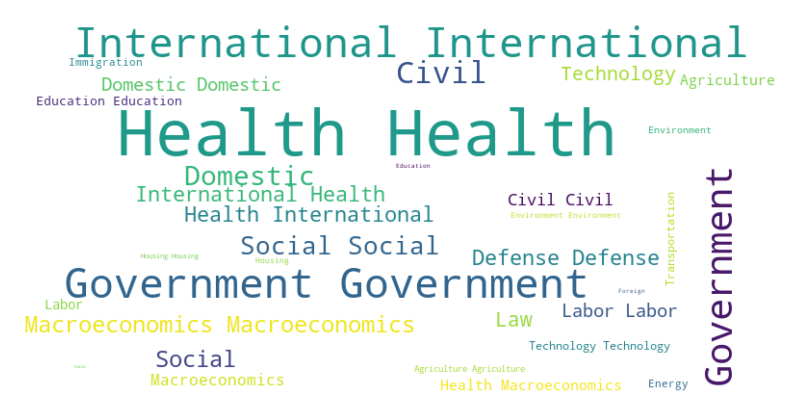

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(topic_labels):
    """
    Generate and display a word cloud from a list of topic labels.

    Args:
        topic_labels (list): List of topic labels.

    Returns:
        None
    """
    # Combine all topic labels into a single string
    topic_text = " ".join(topic_labels)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

topic_labels = topic_df['topic'].explode().tolist()  # Explode the list of lists into a flat list
generate_wordcloud(topic_labels)

The topic 'your_target_topic_label' is mentioned 0 times.


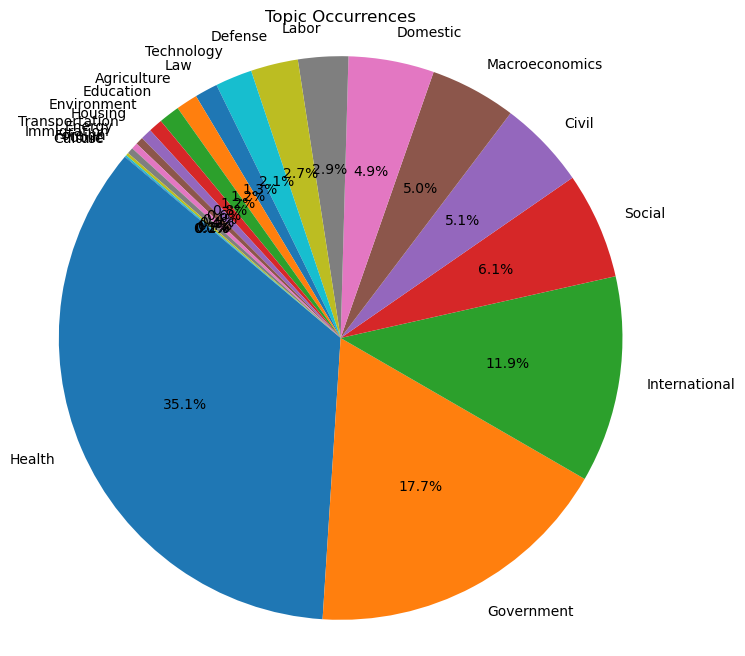

In [72]:
def count_topic_mentions(classification_df, target_topic_label):
    """
    Count how often a specific topic is mentioned in the classification results DataFrame.

    Args:
        classification_df (pd.DataFrame): DataFrame containing classification results.
        target_topic_label (str): The label of the topic you want to count mentions of.

    Returns:
        int: The count of mentions of the target topic label.
    """
    # Count occurrences of the target topic label in the 'label' column
    topic_mentions_count = (classification_df['label'] == target_topic_label).sum()
    
    return topic_mentions_count

# Example usage:
target_topic_label = 'your_target_topic_label'  # Replace with the actual label you want to count
mentions_count = count_topic_mentions(classification_df, target_topic_label)
print(f"The topic '{target_topic_label}' is mentioned {mentions_count} times.")



def visualize_topic_occurrences_pie_chart(topic_counts_df):
    """
    Visualize topic occurrences in a pie chart.

    Args:
        topic_counts_df (pd.DataFrame): DataFrame with topics and their counts.

    Returns:
        None
    """
    # Extract topics and their corresponding counts
    topics = topic_counts_df['Topic']
    counts = topic_counts_df['Count']
    
    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=topics, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Set chart title
    plt.title('Topic Occurrences')

    # Display the pie chart
    plt.show()

# Example usage:
visualize_topic_occurrences_pie_chart(topic_counts_df)


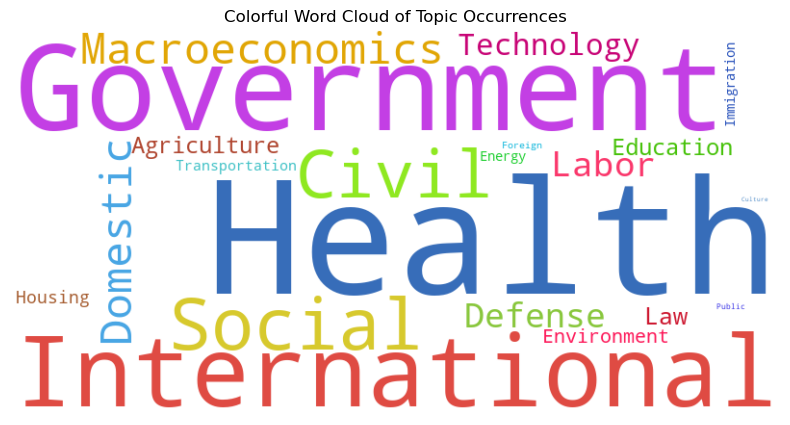

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Custom color function
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    import random
    h = random.randint(0, 360)  # Random hue value for a different color
    s = random.randint(50, 100)  # Random saturation for vibrant colors
    l = random.randint(40, 60)  # Random lightness for a balanced appearance
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Convert the topic counts DataFrame into a dictionary
topic_counts_dict = dict(zip(topic_counts_df['Topic'], topic_counts_df['Count']))

# Generate a word cloud with the custom color function
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=random_color_func).generate_from_frequencies(topic_counts_dict)

# Create a figure for the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Colorful Word Cloud of Topic Occurrences')

# Display the word cloud
plt.show()



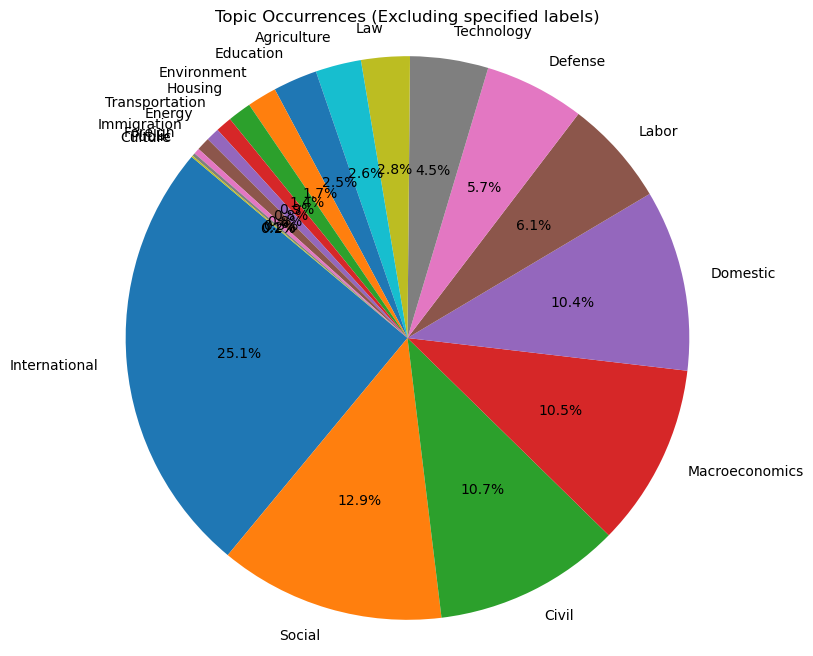

In [73]:
import matplotlib.pyplot as plt

def visualize_topic_occurrences_pie_chart(topic_counts_df, excluded_labels=[]):
    """
    Visualize topic occurrences in a pie chart, excluding specified labels.

    Args:
        topic_counts_df (pd.DataFrame): DataFrame with topics and their counts.
        excluded_labels (list): List of labels to exclude from the pie chart.

    Returns:
        None
    """
    # Filter out excluded labels from the DataFrame
    filtered_df = topic_counts_df[~topic_counts_df['Topic'].isin(excluded_labels)]
    
    # Extract topics and their corresponding counts
    topics = filtered_df['Topic']
    counts = filtered_df['Count']
    
    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=topics, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Set chart title
    plt.title('Topic Occurrences (Excluding specified labels)')

    # Display the pie chart
    plt.show()

# Example usage:
excluded_labels = ['Health', 'Government']  # Specify labels to exclude
visualize_topic_occurrences_pie_chart(topic_counts_df, excluded_labels)


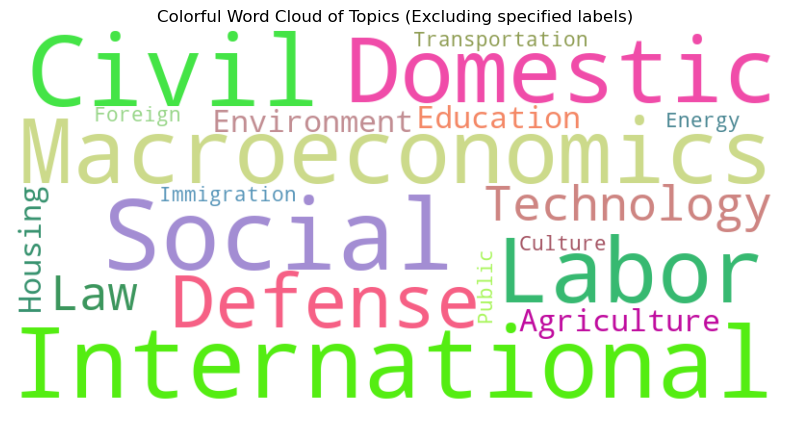

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Custom color function for word cloud
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    # Generate a random color
    return "hsl({}, {}%, {}%)".format(random.randint(0, 360), random.randint(30, 90), random.randint(40, 70))

# Assuming you have a DataFrame 'topic_counts_df' with the column 'Topic'
# Extract the relevant text data for word cloud generation, excluding the excluded labels
excluded_labels = ['Health', 'Government']  # Specify labels to exclude
filtered_df = topic_counts_df[~topic_counts_df['Topic'].isin(excluded_labels)]
text_data = ' '.join(filtered_df['Topic'])

# Create a WordCloud object with the custom color function
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=random_color_func).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Colorful Word Cloud of Topics (Excluding specified labels)')
plt.show()


## 3. Deskriptive Datenanalyse 

### I. Corona Fallzahlen 

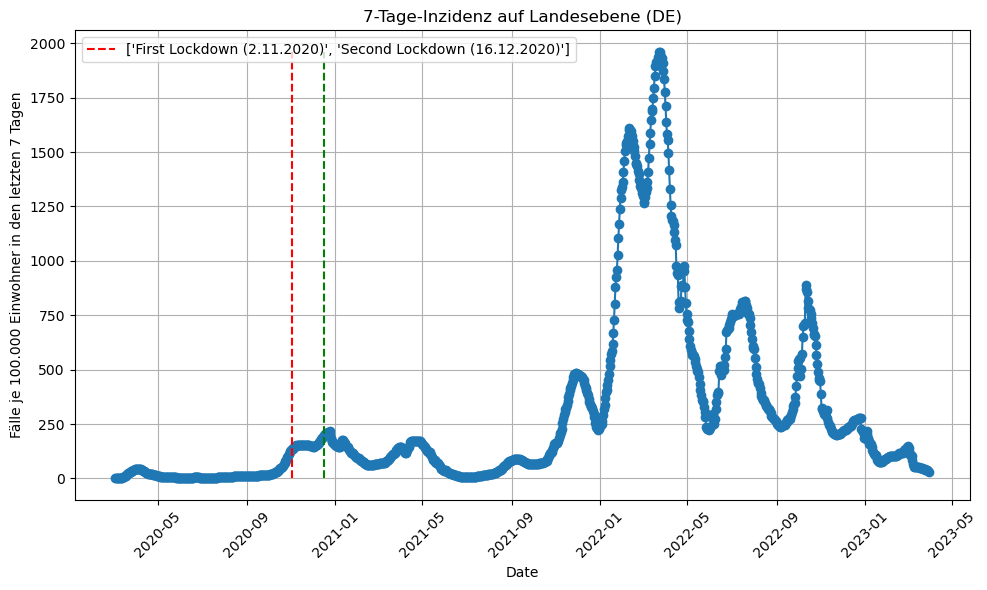

In [24]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen)')
plt.grid(True)
plt.xticks(rotation=45)

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
plt.vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
plt.grid(True)
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### II. Sentiment

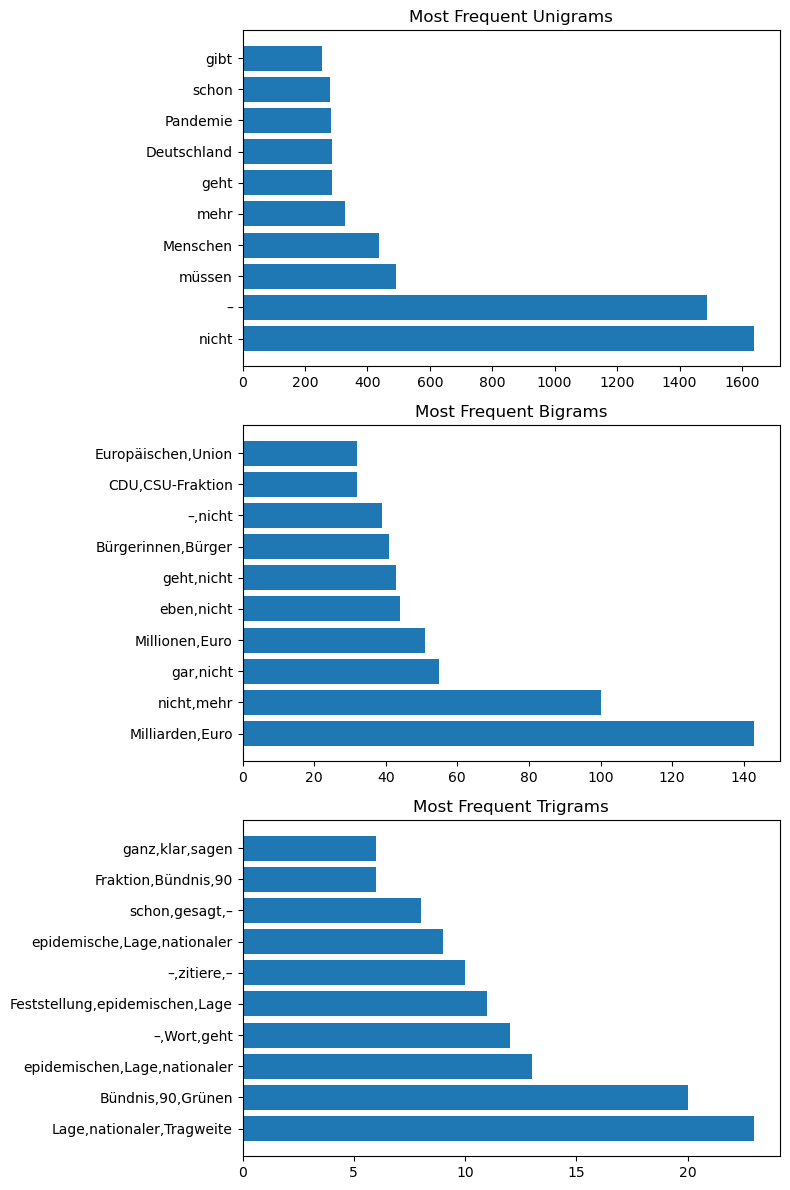

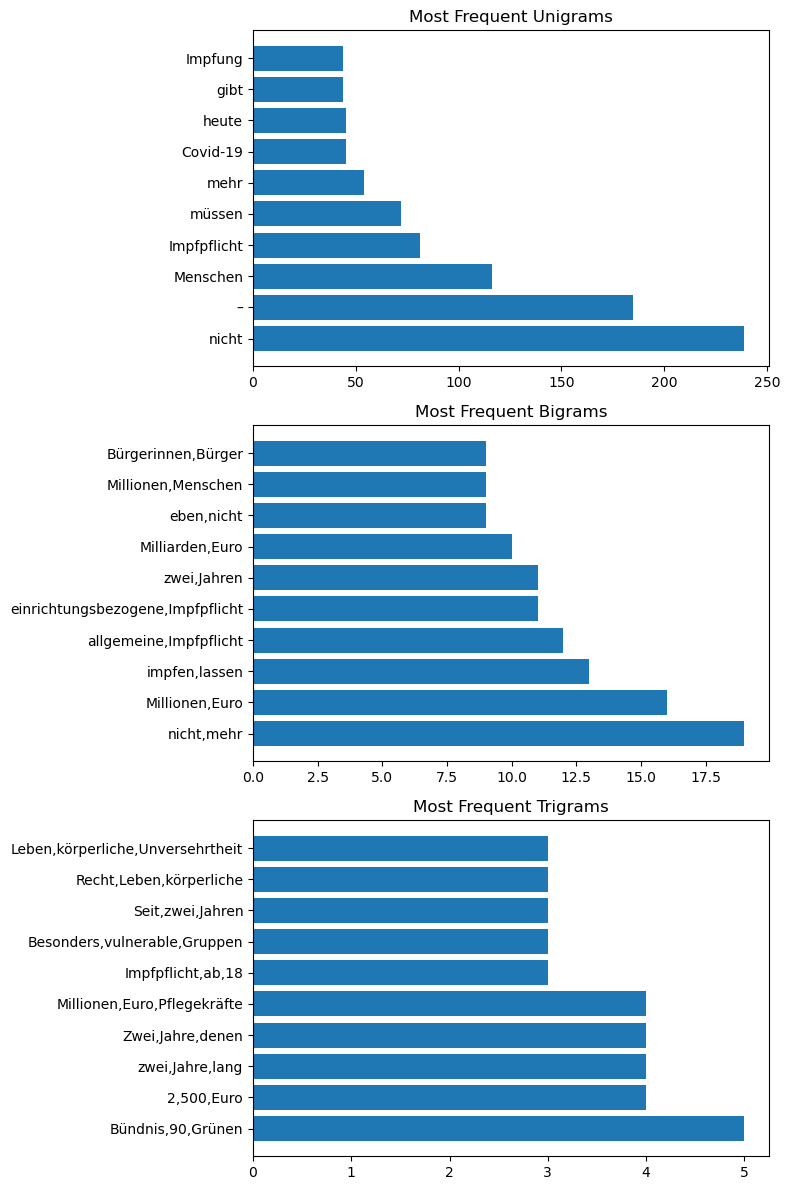

In [37]:
#Ausgabe der nGrams, um Stopwortliste zu überarbeiten
ngram_Stoppwortliste19 = Sentiment_Methods.plot_most_frequent_ngrams (df_sentiment19)
ngram_Stoppwortliste20 = Sentiment_Methods.plot_most_frequent_ngrams (df_sentiment20)

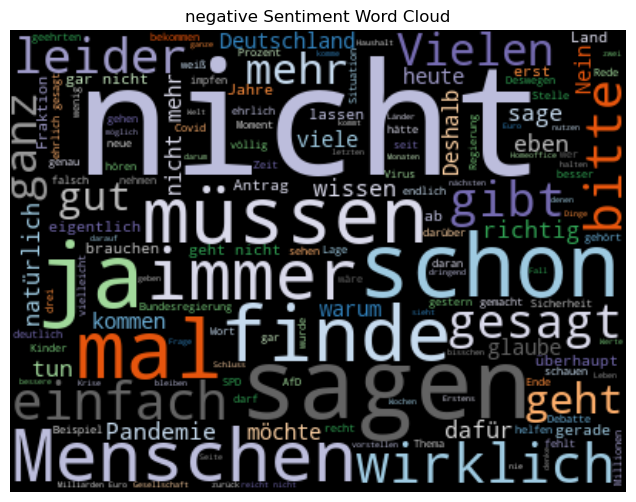

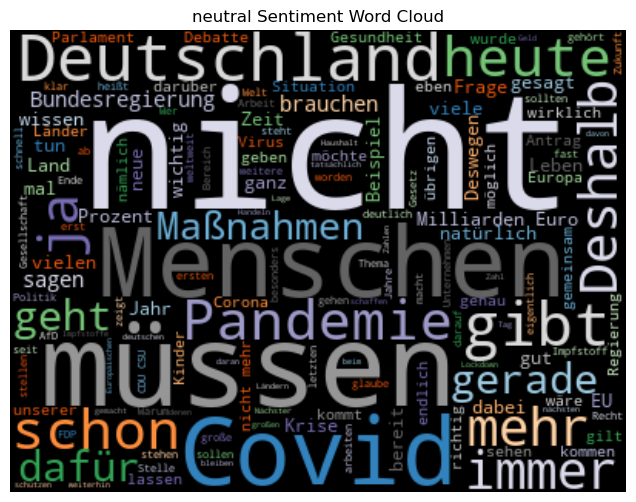

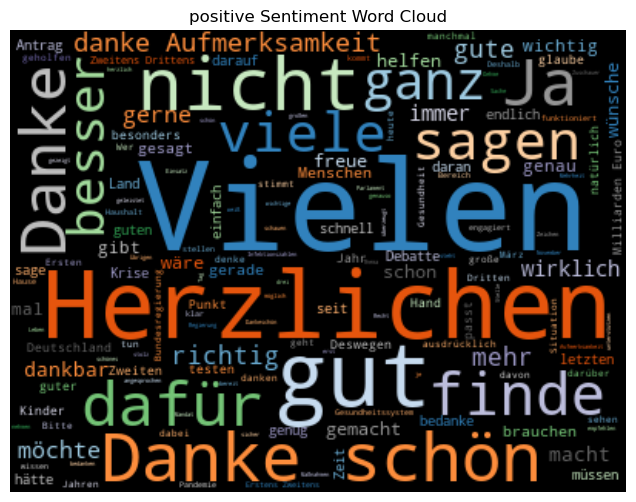

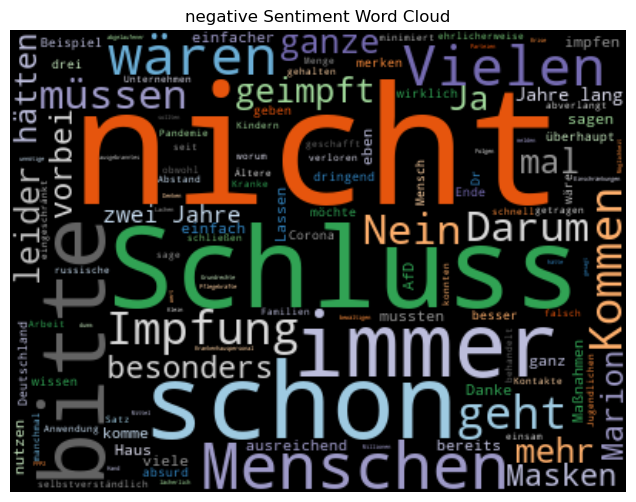

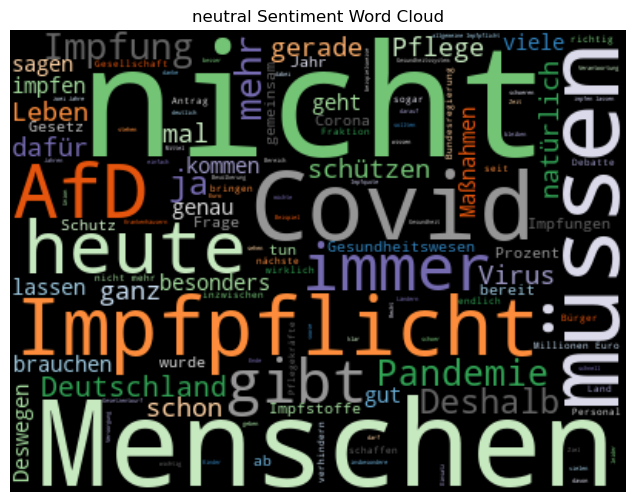

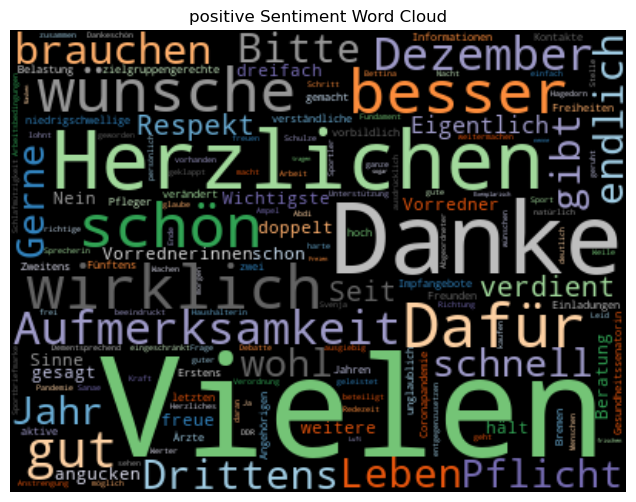

In [40]:
Sentiment_Methods.plot_sentiment_analysis(df_sentiment19, df_sentiment20)


In [ ]:

Sentiment_Methods.plot_sentiment_wordclouds (df_sentiment19)
Sentiment_Methods.plot_sentiment_wordclouds (df_sentiment20)

In [13]:
# Plotten nach Parteizugehörigkeit durch Methodenaufrufe plot Sentiment by party
Sentiment_Methods.plot_sentiment_by_party(df_sentiment19)

Sentiment_Methods.plot_sentiment_by_party(df_sentiment20)

## 5. Vergleichende Analyse

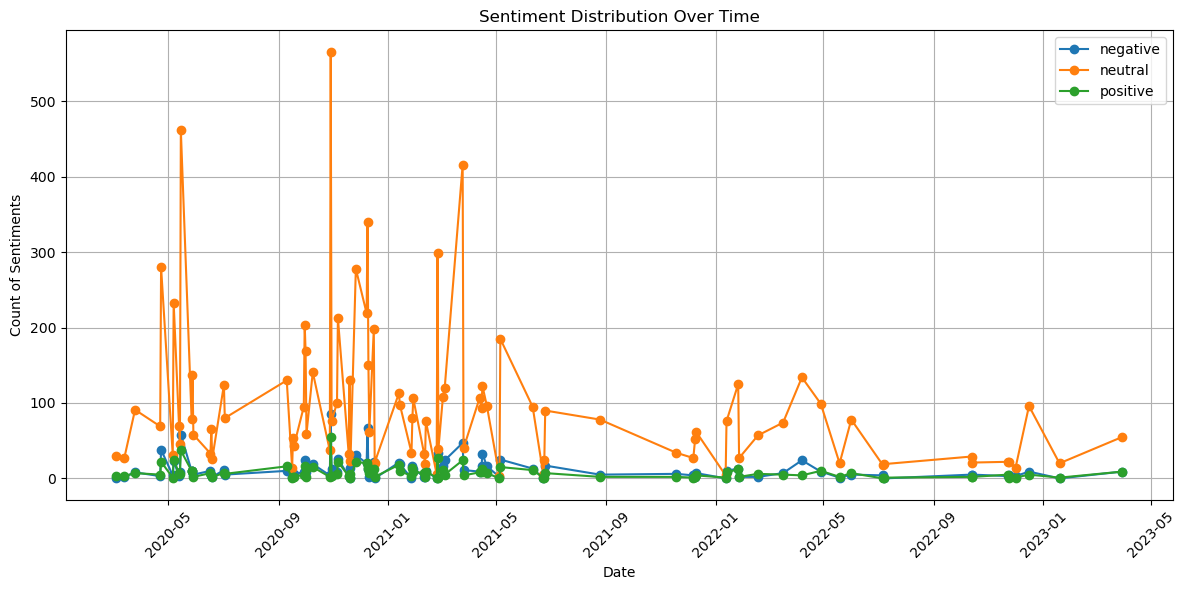

In [41]:
# Group the DataFrame by 'Date' and 'Sentiment' to count occurrences
sentiment_counts = merged_df.groupby(['date', 'Sentiment_Label']).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each sentiment category for each day
for sentiment in sentiment_counts.columns:
    plt.plot(sentiment_counts.index, sentiment_counts[sentiment], marker='o', linestyle='-', label=sentiment)

# Customize the plot
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Sentiments')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


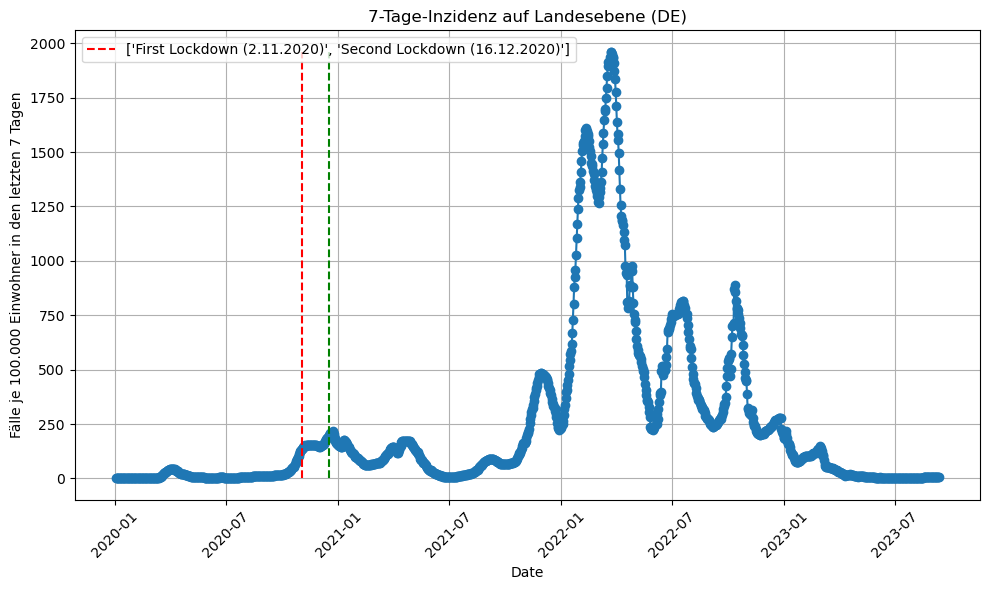

In [16]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen)')
plt.grid(True)
plt.xticks(rotation=45)

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
plt.vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
plt.grid(True)
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
start_date = max(merged_df['date'].min(), corona_fallzahlen_gesamt['date'].min())
end_date = min(merged_df['date'].max(), corona_fallzahlen_gesamt['date'].max())

# Filter both DataFrames to the overlapping date range
merged_df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]
corona_fallzahlen_gesamt = corona_fallzahlen_gesamt[
    (corona_fallzahlen_gesamt['date'] >= start_date) & (corona_fallzahlen_gesamt['date'] <= end_date)
]


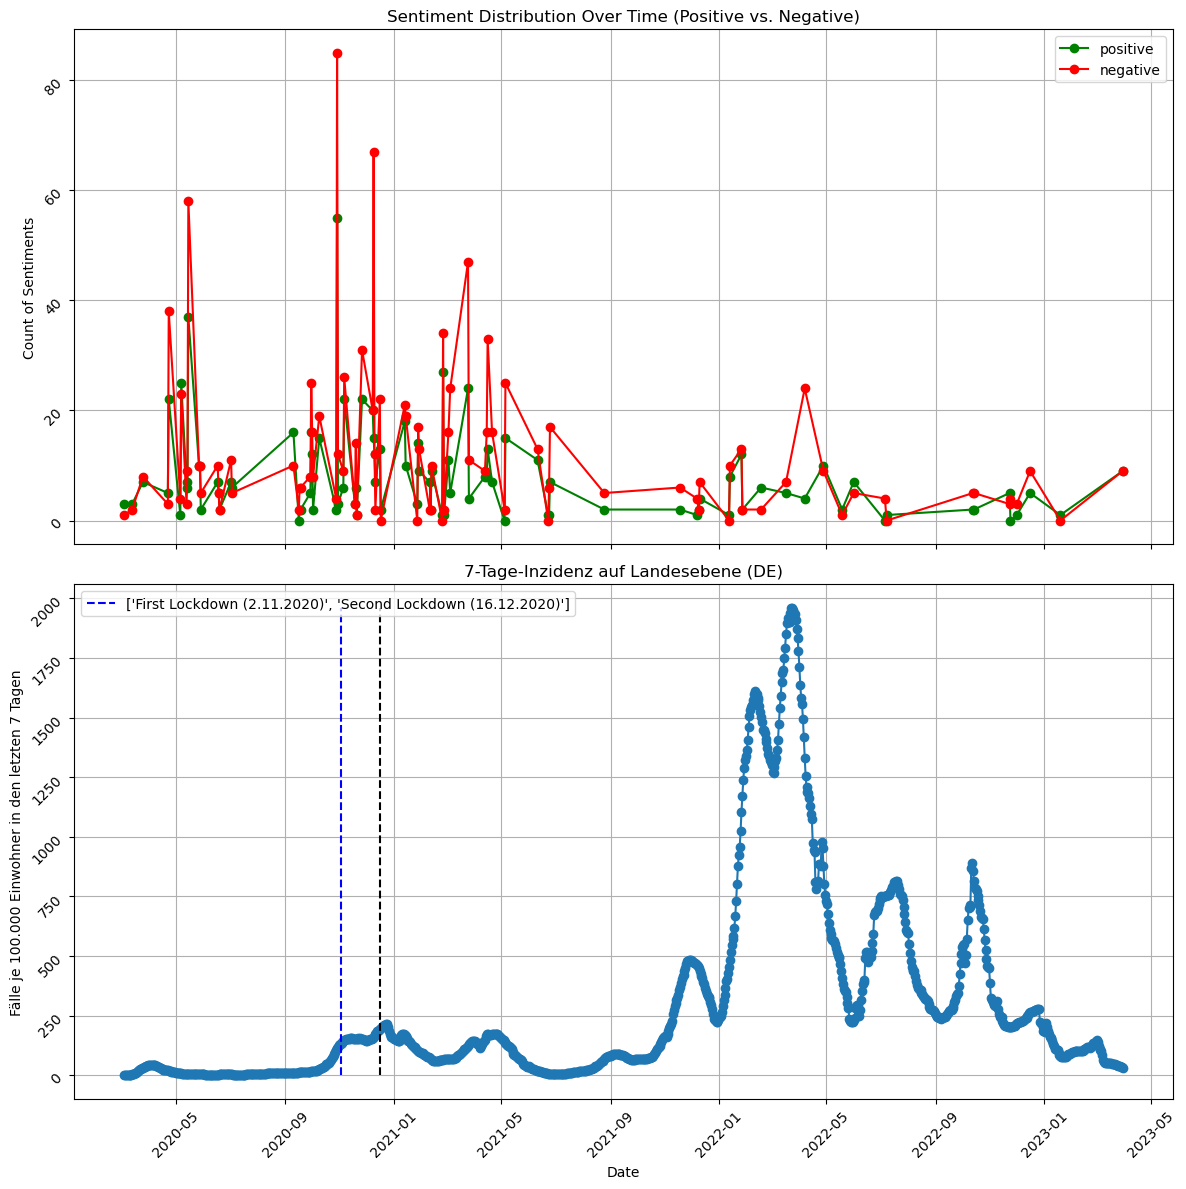

In [18]:
# Create a figure with two vertically stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot 1: Sentiment Distribution Over Time (Positive vs. Negative)
# Group the DataFrame by 'Date' and 'Sentiment' to count occurrences
sentiment_counts = merged_df.groupby(['date', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_counts_filtered = sentiment_counts[['positive', 'negative']]


# Define colors for the lines
colors = ['green', 'red']

# Plot each sentiment category for each day
for sentiment, color in zip(sentiment_counts_filtered.columns, colors):
    axs[0].plot(sentiment_counts_filtered.index, sentiment_counts_filtered[sentiment], marker='o', linestyle='-', label=sentiment, color=color)

# Customize the first plot
axs[0].set_title('Sentiment Distribution Over Time (Positive vs. Negative)')
axs[0].set_ylabel('Count of Sentiments')
axs[0].grid(True)
axs[0].tick_params(rotation=45)
axs[0].legend()

# Plot 2: 7-Tage-Inzidenz
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['blue', 'black'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the second plot
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
axs[1].grid(True)
axs[1].tick_params(rotation=45)
axs[1].legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the combined plot
plt.show()

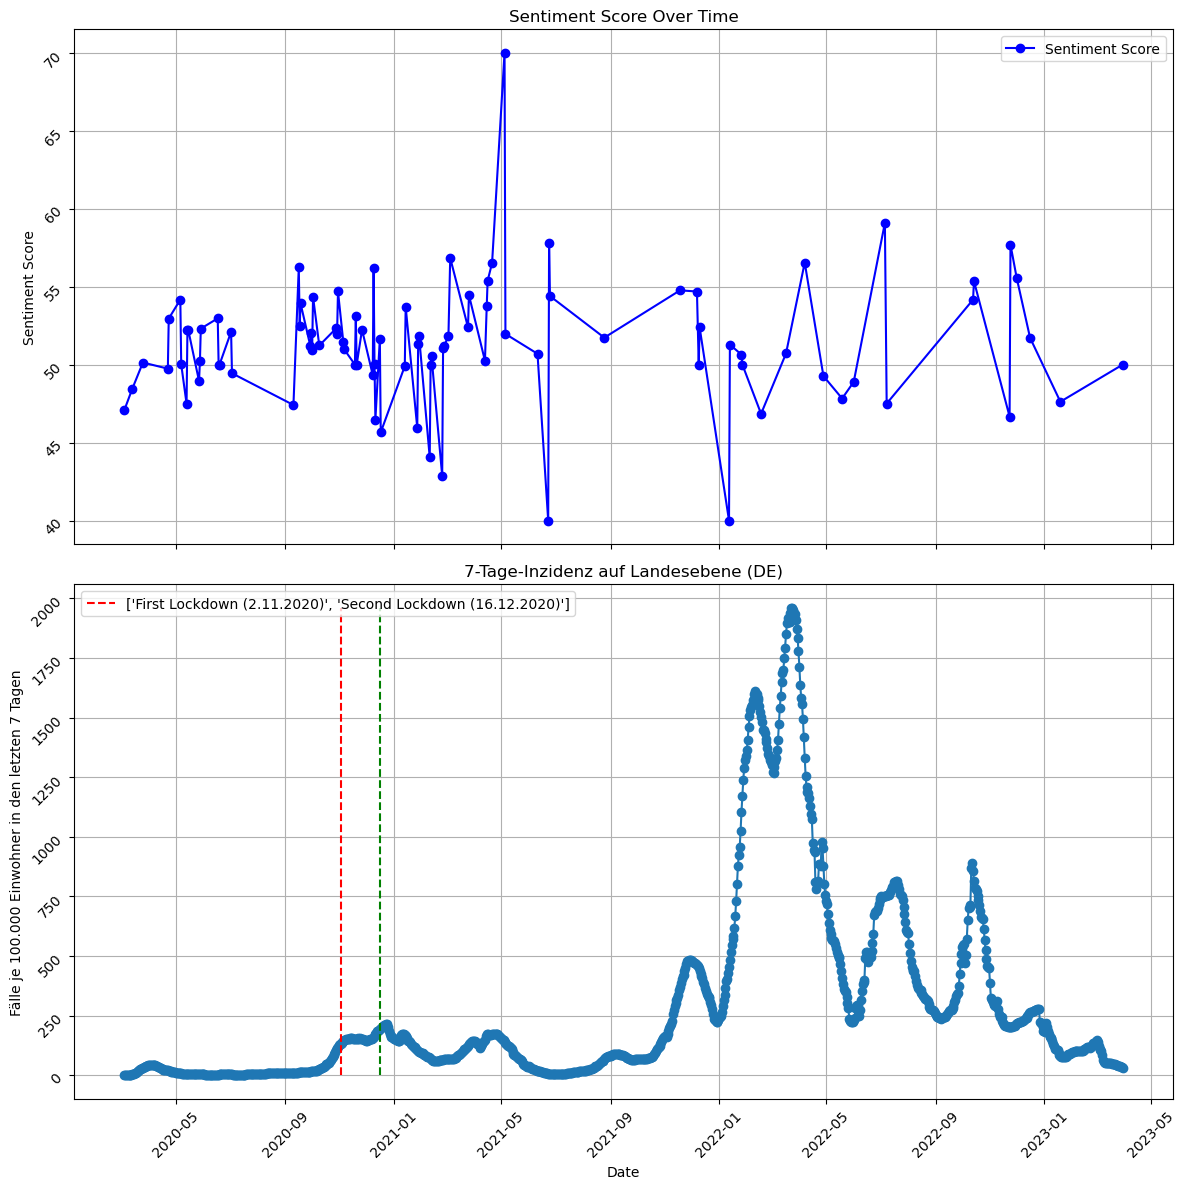

In [19]:
# Create a figure with two vertically stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot 1: Sentiment Distribution Over Time (Positive vs. Negative) using 'result_df'
# Group the DataFrame by 'date' and calculate the average sentiment score for each day
sentiment_scores = result_df.groupby('date')['Sentiment_Score'].mean()

# Plot the sentiment scores
axs[0].plot(sentiment_scores.index, sentiment_scores, marker='o', linestyle='-', label='Sentiment Score', color='blue')

# Customize the first plot
axs[0].set_title('Sentiment Score Over Time')
axs[0].set_ylabel('Sentiment Score')
axs[0].grid(True)
axs[0].tick_params(rotation=45)
axs[0].legend()

# Plot 2: 7-Tage-Inzidenz using 'corona_fallzahlen_gesamt'
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the second plot
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
axs[1].grid(True)
axs[1].tick_params(rotation=45)
axs[1].legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the combined plot
plt.show()


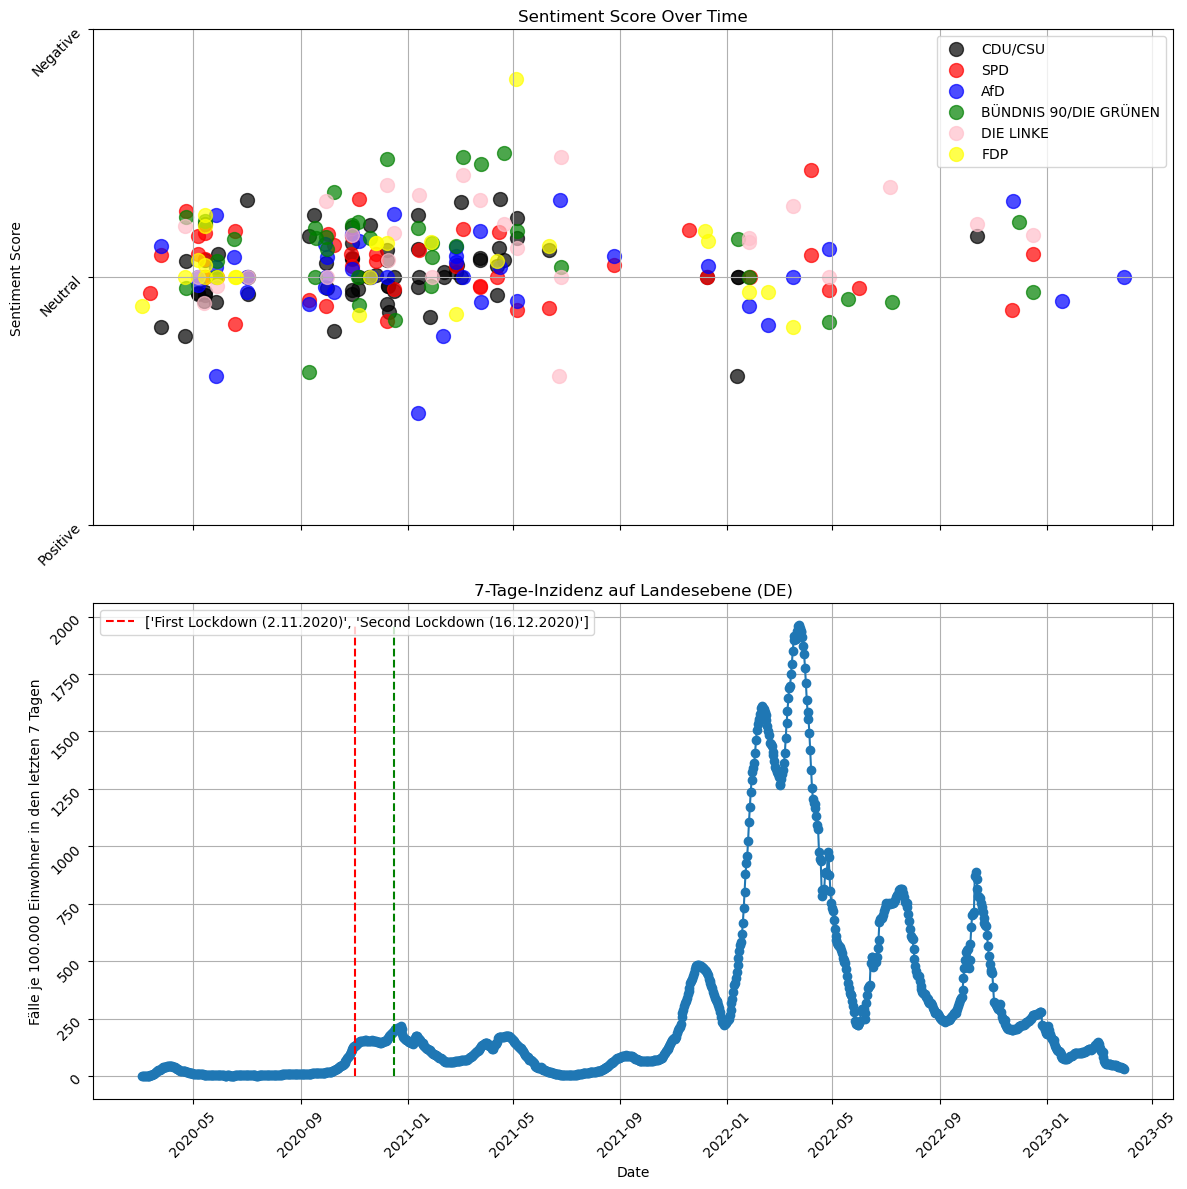

In [20]:

import matplotlib.dates as mdates


# Create a figure with two vertically stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot 1: Sentiment Distribution Over Time (Positive vs. Negative) using 'result_df'
# Group the DataFrame by 'date' and calculate the average sentiment score for each day
sentiment_scores = result_df.groupby('date')['Sentiment_Score'].mean()

# Transform the sentiment scores to the desired range
transformed_sentiment_scores = 100 - (sentiment_scores * 100)

# Define a color map for parties
party_colors = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'AfD': 'blue',
    'BÜNDNIS 90/DIE GRÜNEN': 'green',
    'DIE LINKE': 'pink',
    'FDP':'yellow',
}
# For size of the data
marker_scaling_factor = 100  # Adjust this value as needed

# Create a scatterplot for sentiment scores with colors based on party
for party, color in party_colors.items():
    party_data = result_df[result_df['party'] == party]
    axs[0].scatter(party_data['date'], party_data['Sentiment_Score'],
                   label=party, color=color, alpha=0.7, marker='o', s=marker_scaling_factor)

# Customize the first plot
axs[0].set_title('Sentiment Score Over Time')
axs[0].set_ylabel('Sentiment Score')
axs[0].grid(True)
axs[0].tick_params(rotation=45)
axs[0].legend()

# Adjust the y-axis of the first plot based on the sentiment score range
min_sentiment_score = result_df['Sentiment_Score'].min()
max_sentiment_score = result_df['Sentiment_Score'].max()
axs[0].set_ylim(min_sentiment_score, max_sentiment_score)

# Add y-axis labels for sentiment
axs[0].set_yticks([ 25, 50, 75])
axs[0].set_yticklabels(['Positive', 'Neutral', 'Negative'])

# Plot 2: 7-Tage-Inzidenz using 'corona_fallzahlen_gesamt'
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the second plot
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
axs[1].grid(True)
axs[1].tick_params(rotation=45)
axs[1].legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the combined plot
plt.show()


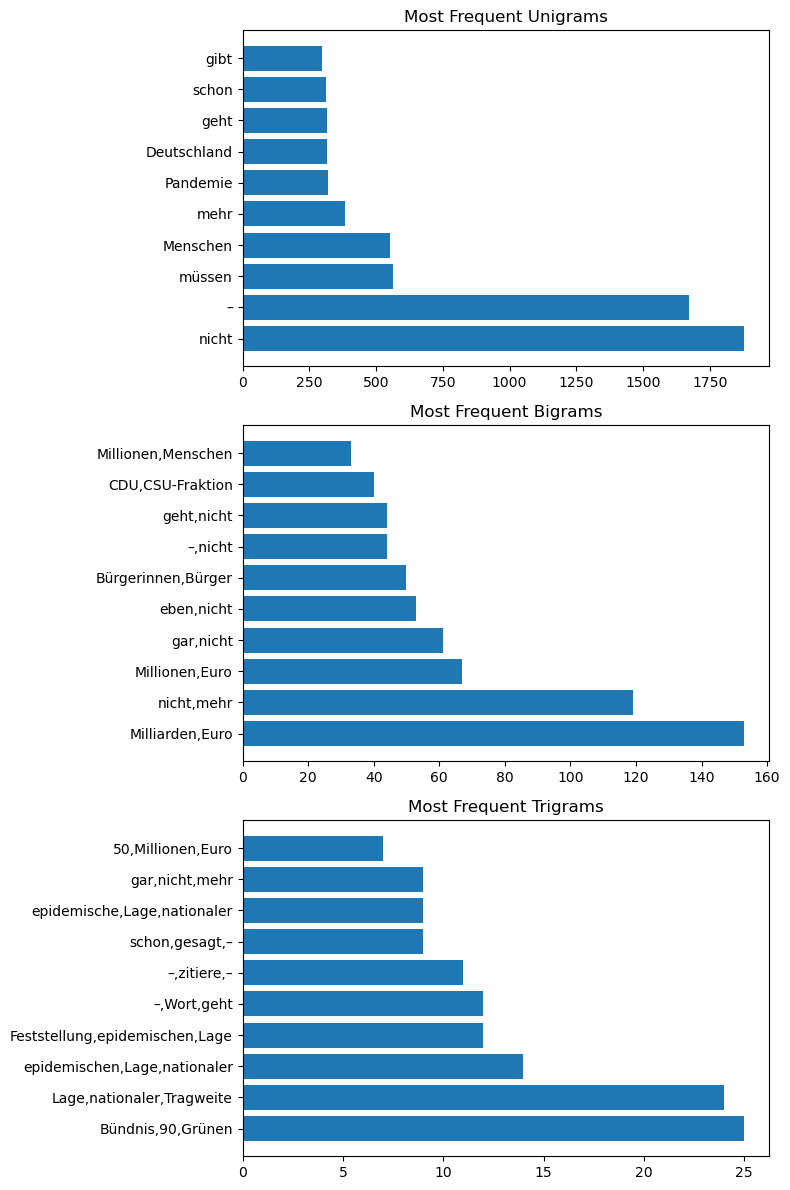

In [21]:
#Ausgabe der nGrams, um Stopwortliste zu überarbeiten
ngram_Stoppwortliste1 = Sentiment_Methods.plot_most_frequent_ngrams (merged_df)

Sentiment_Methods.plot_sentiment_by_party(merged_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


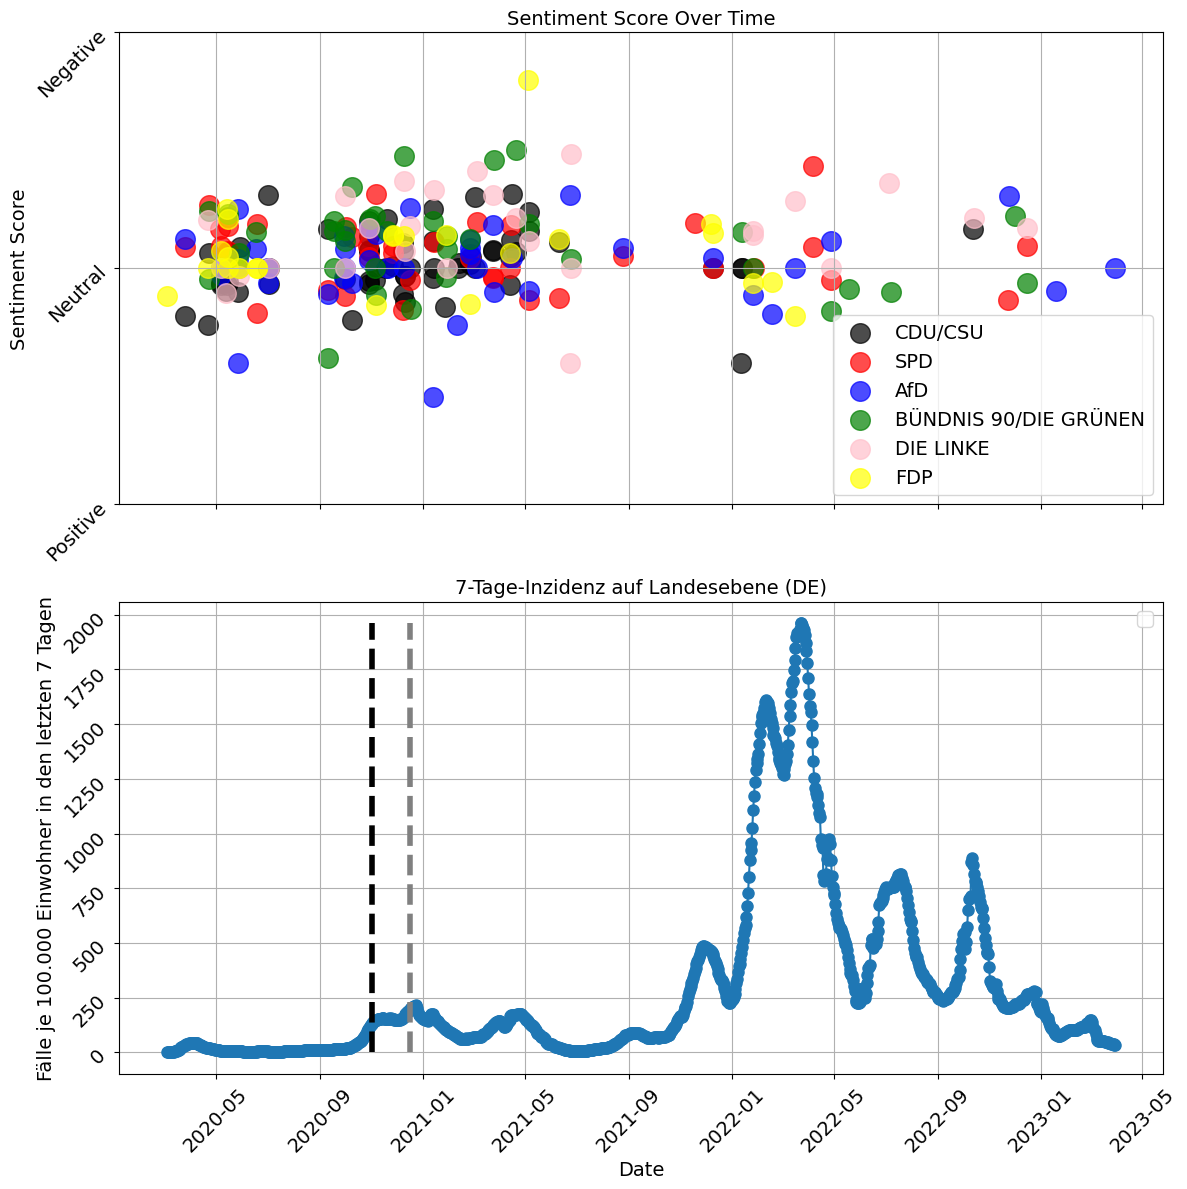

In [78]:
# Import the necessary libraries
import matplotlib.dates as mdates

# Create a figure with two vertically stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Increase the size of the bubbles and graphical lines
marker_scaling_factor = 200  # Increase this value as needed

# Set a larger font size
font_size = 14  # Increase this value as needed

# Plot 1: Sentiment Distribution Over Time (Positive vs. Negative) using 'result_df'
# Group the DataFrame by 'date' and calculate the average sentiment score for each day
sentiment_scores = result_df.groupby('date')['Sentiment_Score'].mean()

# Transform the sentiment scores to the desired range
transformed_sentiment_scores = 100 - (sentiment_scores * 100)

# Create a scatterplot for sentiment scores with colors based on party
for party, color in party_colors.items():
    party_data = result_df[result_df['party'] == party]
    axs[0].scatter(party_data['date'], party_data['Sentiment_Score'],
                   label=party, color=color, alpha=0.7, marker='o', s=marker_scaling_factor)

# Customize the first plot
axs[0].set_title('Sentiment Score Over Time', fontsize=font_size)
axs[0].set_ylabel('Sentiment Score', fontsize=font_size)
axs[0].grid(True)
axs[0].tick_params(rotation=45, labelsize=font_size)
axs[0].legend(fontsize=font_size)

# Adjust the y-axis of the first plot based on the sentiment score range
min_sentiment_score = result_df['Sentiment_Score'].min()
max_sentiment_score = result_df['Sentiment_Score'].max()
axs[0].set_ylim(min_sentiment_score, max_sentiment_score)

# Add y-axis labels for sentiment
axs[0].set_yticks([ 25, 50, 75])
axs[0].set_yticklabels(['Positive', 'Neutral', 'Negative'], fontsize=font_size)

# Plot 2: 7-Tage-Inzidenz using 'corona_fallzahlen_gesamt'
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-', markersize=8)  # Increase markersize

# Add vertical lines for the lockdown dates with updated style and thickness
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['black', 'grey'], linestyle=['--', '--'], linewidth=4)  # Adjust linestyle and linewidth

# Customize the second plot
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)', fontsize=font_size)
axs[1].set_xlabel('Date', fontsize=font_size)
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen', fontsize=font_size)
axs[1].grid(True)
axs[1].tick_params(rotation=45, labelsize=font_size)
axs[1].legend(fontsize=font_size)

# Adjust subplot spacing
plt.tight_layout()

# Show the combined plot
plt.show()


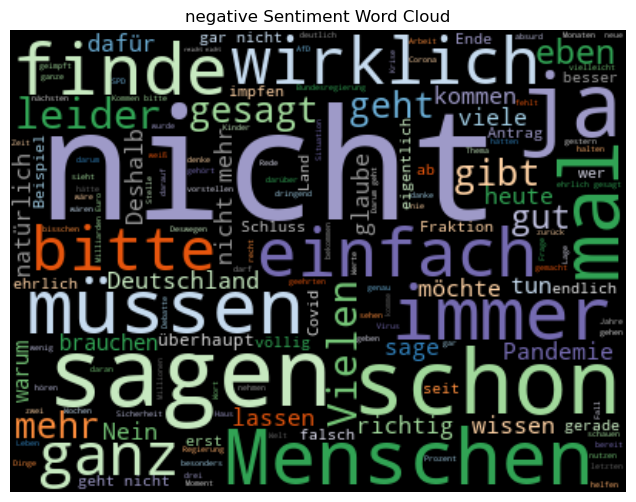

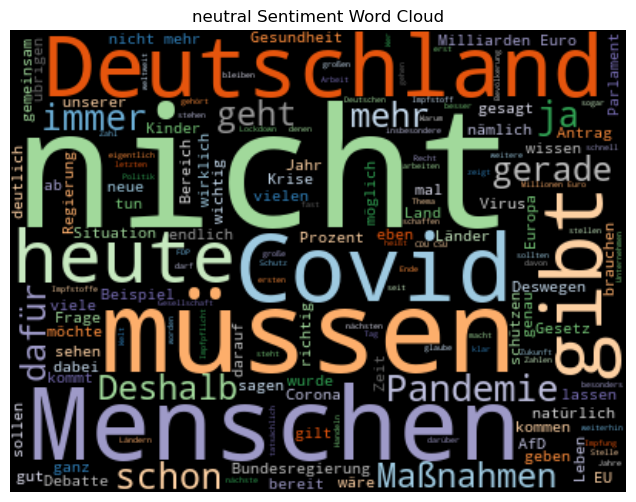

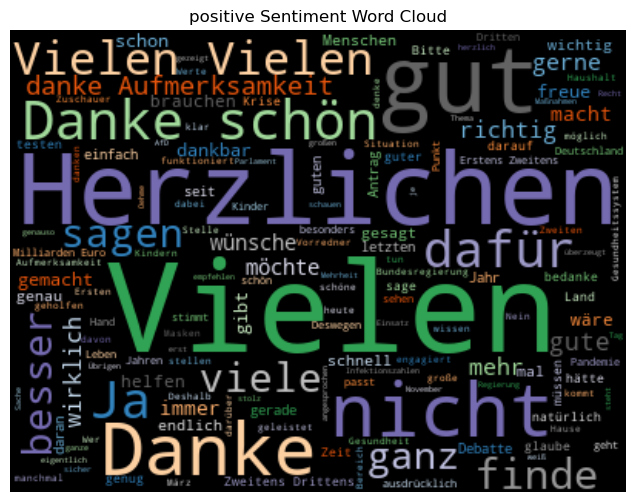

In [22]:
Sentiment_Methods.plot_sentiment_wordclouds (merged_df)

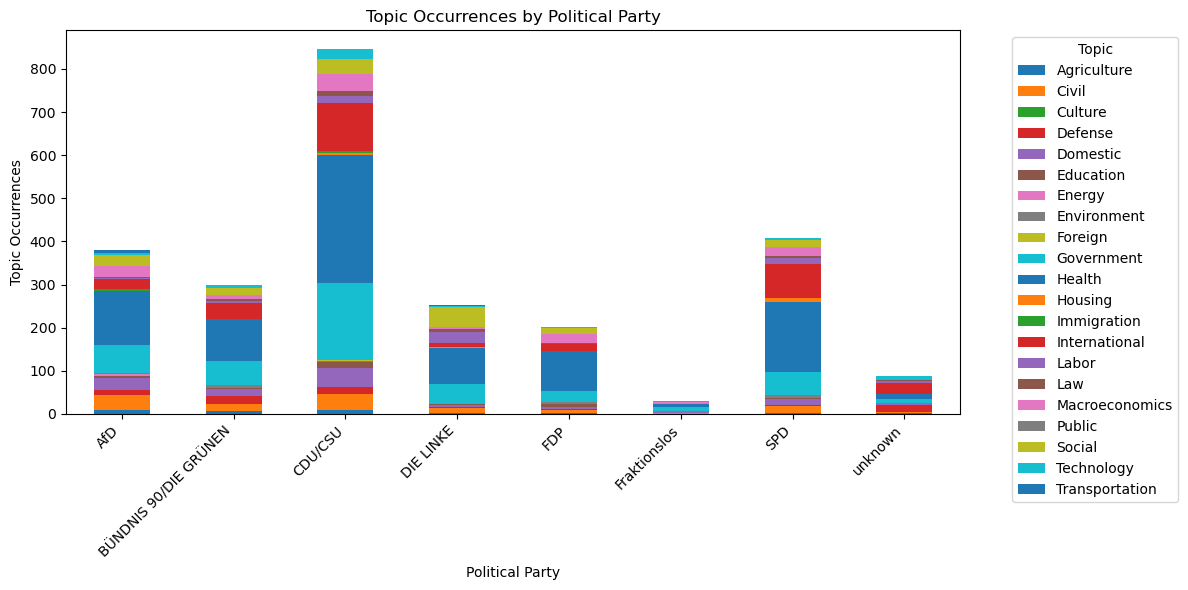

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_topic_occurrences_by_party(topic_df):
    """
    Visualize the occurrence of topics by political party.

    Args:
        topic_df (pd.DataFrame): DataFrame containing data with columns 'party' and 'label'.

    Returns:
        None
    """
    # Flatten the 'label' column, which contains lists of topics
    topic_df = topic_df.explode('topic')
    
    # Group by party and topic, then count occurrences
    topic_counts = topic_df.groupby(['party', 'topic']).size().unstack(fill_value=0)
    
    # Plot the data as a bar chart
    topic_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
    
    # Customize the plot
    plt.title('Topic Occurrences by Political Party')
    plt.xlabel('Political Party')
    plt.ylabel('Topic Occurrences')
    plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_topic_occurrences_by_party(topic_df)
